In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df1=df.drop('label',axis=1)

In [5]:
l=df['label']

In [6]:
l.shape

(42000,)

In [7]:
df1.shape

(42000, 784)

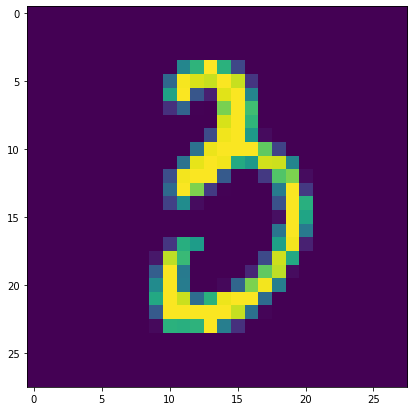

3


In [8]:
plt.figure(figsize=(7,7))
idx=150
grid_data=df1.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation="nearest")
plt.show()
print(l[idx])

In [9]:
label=l.head(15000)
data=df1.head(15000)
print(label.shape)
print(data.shape)

(15000,)
(15000, 784)


In [10]:
from sklearn.preprocessing import StandardScaler
st_data=StandardScaler().fit_transform(data)
print(st_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
matr=st_data
cov_mat=np.matmul(matr.T,matr)
cov_mat.shape

(784, 784)

In [12]:

from scipy.linalg import eigh
values,vectors=eigh(cov_mat,eigvals=(782,783))
print(vectors.shape)
vectors

(784, 2)


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [13]:
print(values)

[435532.55785282 605719.29173629]


In [14]:
vectors=vectors.T
print(vectors.shape)
vectors

(2, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
new_coord=np.matmul(vectors,matr.T)
print(new_coord.shape)

(2, 15000)


In [16]:
new_coord=np.vstack((new_coord,label)).T

In [17]:
new_coord

array([[-5.5586608 , -5.04355835,  1.        ],
       [ 6.19363477, 19.30527806,  0.        ],
       [-1.90987794, -7.67877525,  1.        ],
       ...,
       [-2.14793723, -1.50726893,  8.        ],
       [ 3.20412249, -6.53731291,  9.        ],
       [-6.87896871, -1.25625388,  6.        ]])

In [18]:
data=pd.DataFrame(data=new_coord,columns=("1st_principal","2nd_principal","label"))

In [19]:
data

,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0
...,...,...,...
14995,3.139416,-4.758956,1.0
14996,1.946714,-1.314215,4.0
14997,-2.147937,-1.507269,8.0
14998,3.204122,-6.537313,9.0


In [20]:
import seaborn as sns 

c:\users\saran\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


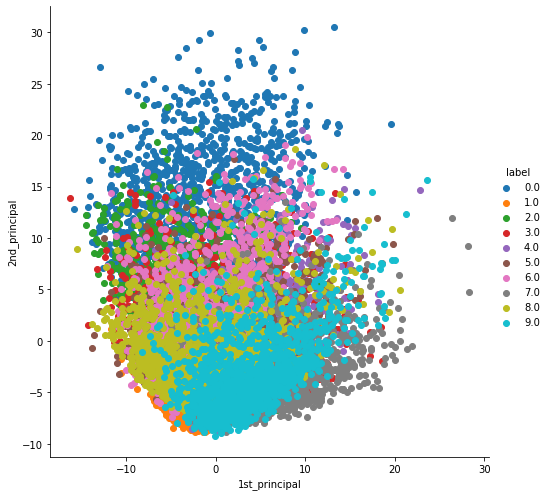

In [21]:
sns.FacetGrid(data,hue='label',size=7).map(plt.scatter,'1st_principal','2nd_principal').add_legend()

In [22]:
from sklearn.decomposition import PCA
pca=PCA()
pca.n_components=2
pca_data=pca.fit_transform(matr)
pca_data.shape

(15000, 2)

In [23]:
label

0        1
1        0
2        1
3        4
4        0
        ..
14995    1
14996    4
14997    8
14998    9
14999    6
Name: label, Length: 15000, dtype: int64

c:\users\saran\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


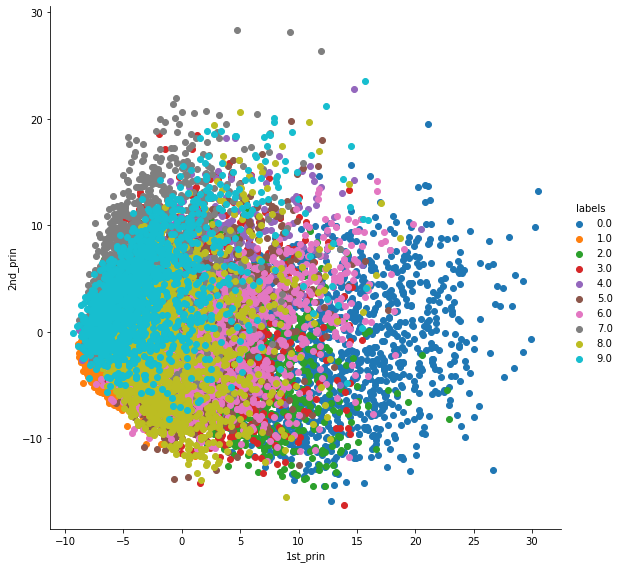

In [24]:
pca_data=np.vstack((pca_data.T,label)).T


pca_df=pd.DataFrame(data=pca_data,columns=("1st_prin","2nd_prin","labels"))
sns.FacetGrid(pca_df,hue='labels',size=8).map(plt.scatter,"1st_prin","2nd_prin").add_legend()

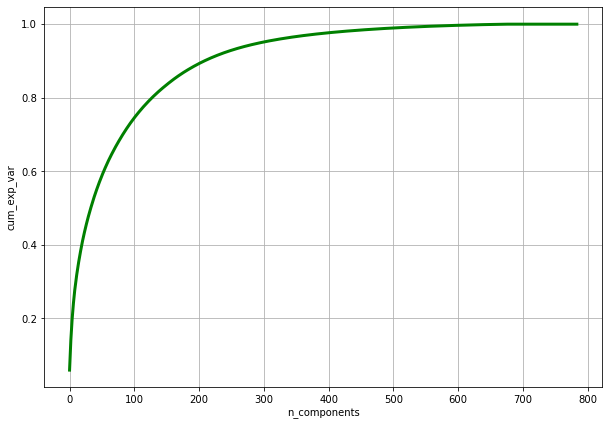

In [39]:
pca.n_components=784
pca_data=pca.fit_transform(matr)
percerntage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_exp=np.cumsum(percerntage_var_explained)
plt.figure(1,figsize=(10,7))
plt.plot(cum_var_exp,linewidth=3,color='g')
plt.axis('tight')
plt.grid()
plt.xlabel("n_components")
plt.ylabel("cum_exp_var")
plt.show()

In [25]:
df1.iloc[idx].to_numpy().reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 117, 166,
        255, 163,  54,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 252, 240,
        234, 254, 234,  40,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [26]:
df1.iloc[100].to_numpy().reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [27]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
y=df.iloc[:,0]
X=df.iloc[:,1:]

In [29]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [30]:
X_tr,X_ts,y_tr,y_ts=train_test_split(X,y,test_size=0.33,random_state=0)

In [31]:
X_tr1,X_cv,y_tr1,y_cv=train_test_split(X_tr,y_tr,test_size=0.33,random_state=0)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#kn=KNeighborsClassifier()

In [33]:
for i in range(1,30,2):
    knn1=KNeighborsClassifier(n_neighbors=i)
    
    knn1.fit(X_tr1,y_tr1)
    
    pred=knn1.predict(X_cv)
    
    acc=accuracy_score(pred,y_cv,normalize=True)*float(100)
    print('\nCV accuracy for k = %d is %d' % (i, acc))
    
    


CV accuracy for k = 1 is 95

CV accuracy for k = 3 is 96

CV accuracy for k = 5 is 96

CV accuracy for k = 7 is 95

CV accuracy for k = 9 is 95

CV accuracy for k = 11 is 95

CV accuracy for k = 13 is 95

CV accuracy for k = 15 is 95

CV accuracy for k = 17 is 94

CV accuracy for k = 19 is 94

CV accuracy for k = 21 is 94

CV accuracy for k = 23 is 94

CV accuracy for k = 25 is 94

CV accuracy for k = 27 is 94

CV accuracy for k = 29 is 94


In [34]:
kn1=KNeighborsClassifier(n_neighbors=5)
kn1.fit(X_tr1,y_tr1)
pred=kn1.predict(X_ts)

In [35]:
acc=accuracy_score(pred,y_ts,normalize=True)*float(100)

In [36]:
acc

95.91630591630592

In [37]:
X=pd.read_csv("test.csv")

In [38]:
X_t=X

In [39]:
predicted=kn1.predict(X_t)

In [40]:
result=pd.DataFrame()

In [41]:
pr=df1.iloc[150]
pr

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 150, Length: 784, dtype: int64

In [42]:
predict=kn1.predict([pr])

In [43]:
predict

array([3], dtype=int64)

In [44]:
mylist=[i for i in range(1,30,2) if i%2!=0]

In [45]:
mylist
cv_scores=[]

In [46]:
from sklearn.model_selection import cross_val_score
for i in mylist:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,X_tr1,y_tr1,cv=3,scoring='accuracy')
    cv_scores.append(scores)


In [47]:
best_k=mylist[cv_scores.index(max(cv_scores))]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()